# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
!pip install citipy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from api_keys import api_key

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)


618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


#Lists for holding variables
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Initiate count for city number below
count = 1

print(f"Beginning Data Retrieval")   
print("-"*40)

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {count} | {city}") 
        
        count += 1
   
    except:
        print(f"City not found. Skipping...")
        continue
print("-"*40)
print(f"Data Retrieval Complete")   
print("-"*40)

Beginning Data Retrieval
----------------------------------------
Processing Record 1 | nikolskoye
Processing Record 2 | alyangula
Processing Record 3 | grand gaube
City not found. Skipping...
City not found. Skipping...
Processing Record 4 | huilong
Processing Record 5 | abha
Processing Record 6 | crixas
Processing Record 7 | isla mujeres
Processing Record 8 | busselton
Processing Record 9 | yelizovo
Processing Record 10 | mar del plata
Processing Record 11 | arraial do cabo
Processing Record 12 | rikitea
Processing Record 13 | kruisfontein
Processing Record 14 | mattru
Processing Record 15 | new norfolk
City not found. Skipping...
City not found. Skipping...
Processing Record 16 | vengerovo
Processing Record 17 | codrington
Processing Record 18 | barrow
Processing Record 19 | les cayes
Processing Record 20 | sur
City not found. Skipping...
Processing Record 21 | jamestown
Processing Record 22 | ushuaia
Processing Record 23 | esperance
Processing Record 24 | hilo
Processing Record 25 

Processing Record 230 | along
Processing Record 231 | kaitangata
Processing Record 232 | meulaboh
Processing Record 233 | rafai
Processing Record 234 | nichinan
Processing Record 235 | saint-augustin
Processing Record 236 | acapulco
Processing Record 237 | nyimba
Processing Record 238 | carnarvon
City not found. Skipping...
Processing Record 239 | yorosso
Processing Record 240 | teknaf
City not found. Skipping...
Processing Record 241 | necochea
Processing Record 242 | magistralnyy
Processing Record 243 | gombe
Processing Record 244 | salalah
Processing Record 245 | yeppoon
Processing Record 246 | mayumba
Processing Record 247 | isangel
City not found. Skipping...
Processing Record 248 | sawakin
Processing Record 249 | kattivakkam
Processing Record 250 | lagoa
Processing Record 251 | mildura
Processing Record 252 | saint george
Processing Record 253 | mapiri
Processing Record 254 | fairbanks
Processing Record 255 | omboue
Processing Record 256 | umm lajj
Processing Record 257 | ixtapa


Processing Record 459 | sulangan
Processing Record 460 | sumbe
City not found. Skipping...
Processing Record 461 | broken hill
Processing Record 462 | dunedin
Processing Record 463 | champerico
Processing Record 464 | kalat
Processing Record 465 | salinopolis
Processing Record 466 | irinjalakuda
Processing Record 467 | oranjemund
Processing Record 468 | tsalka
City not found. Skipping...
Processing Record 469 | santa luzia
Processing Record 470 | ginir
Processing Record 471 | sungaipenuh
Processing Record 472 | georgiyevskoye
Processing Record 473 | taloqan
Processing Record 474 | coolidge
Processing Record 475 | kitimat
Processing Record 476 | evensk
Processing Record 477 | tadine
Processing Record 478 | bud
Processing Record 479 | yeniseysk
Processing Record 480 | krasnogvardeyets
Processing Record 481 | kwinana
Processing Record 482 | jimani
Processing Record 483 | margate
Processing Record 484 | naze
Processing Record 485 | kutum
Processing Record 486 | capleni
Processing Record 48

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#build a data frame's titles
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create df 
weather_data = pd.DataFrame(weather_dict)

# Display count
weather_data.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [17]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nikolskoye,0,RU,1553329750,64,59.70,30.79,37.99,8.95
1,Alyangula,80,AU,1553328000,70,-13.85,136.42,87.80,10.29
2,Grand Gaube,75,MU,1553329740,70,-20.01,57.66,87.80,11.41
3,Huilong,56,CN,1553329772,78,28.89,110.18,51.16,4.38
4,Abha,20,SA,1553328000,40,18.22,42.50,75.20,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

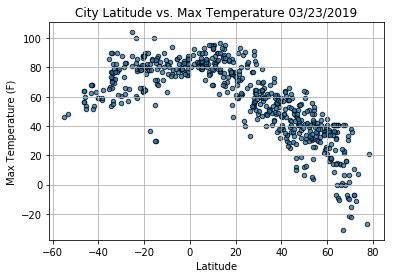

In [18]:
#add today's date in to charts
date = dt.date.today().strftime("%m/%d/%Y")

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

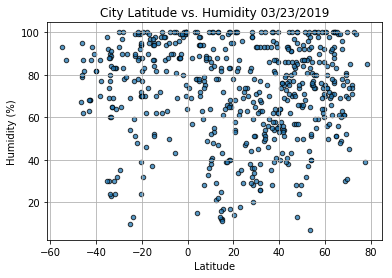

In [19]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

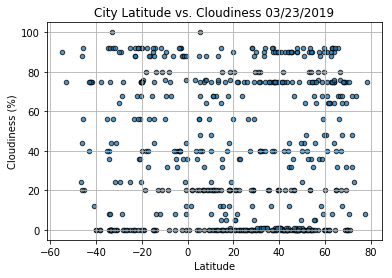

In [20]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

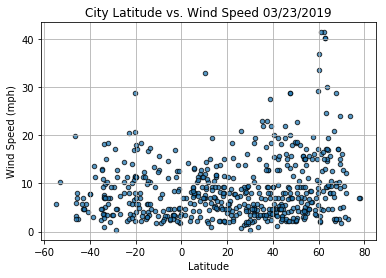

In [21]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Wind Speed.png")
plt.show()